In [10]:
import pandas as pd
import numpy as np

import matplotlib.pylab as plt
%matplotlib inline

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

from scipy.stats import zscore

tech_supp_df = pd.read_csv('technical_support_data.csv')
tech_supp_df.head()

,PROBLEM_TYPE,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent
0,Temperature control not working,170,1.3,32,0.04,0.0,75,25
1,power chord does not tightly fit,12,2.0,150,0.01,0.5,5,95
2,Fan swing not working,5,1.0,35,0.02,0.2,90,10
3,Main switch does not on,3,2.0,8,0.01,0.7,5,95
4,Forgot mobile app password,45,2.3,54,0.15,0.0,99,1


In [11]:
tech_supp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   PROBLEM_TYPE           23 non-null     object 
 1   no_of_cases            23 non-null     int64  
 2   Avg_pending_calls      23 non-null     float64
 3   Avg_resol_time         23 non-null     int64  
 4   recurrence_freq        23 non-null     float64
 5   Replace_percent        23 non-null     float64
 6   In_warranty_percent    23 non-null     int64  
 7   Post_warranty_percent  23 non-null     int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 1.6+ KB


In [12]:
tech_supp_df.shape

(23, 8)

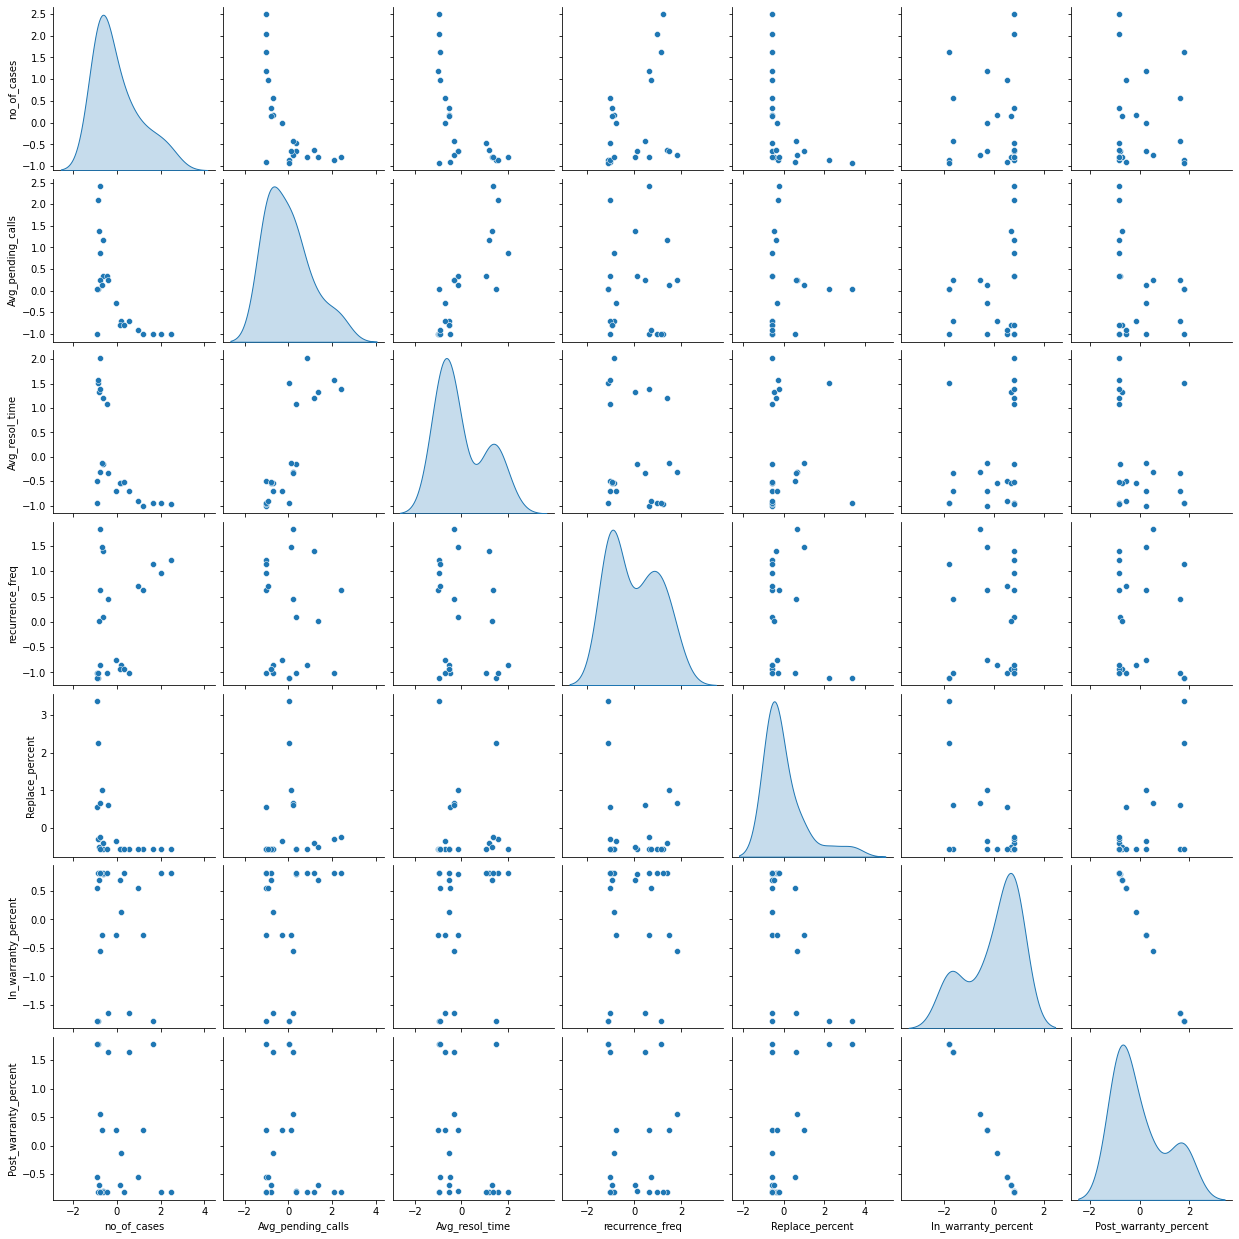

In [13]:
tech_supp_attr = tech_supp_df.iloc[:,1:]
tech_supp_scaled = tech_supp_attr.apply(zscore)
sns.pairplot(tech_supp_scaled, diag_kind= 'kde');

In [14]:
tech_supp_scaled.head()

,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent
0,0.179429,-0.701207,-0.538351,-0.843188,-0.561463,0.138067,-0.138067
1,-0.862176,0.027143,1.510857,-1.101765,2.245854,-1.778204,1.778204
2,-0.908323,-1.013357,-0.486253,-1.015573,0.561463,0.548696,-0.548696
3,-0.921508,0.027143,-0.955140,-1.101765,3.368781,-1.778204,1.778204
4,-0.644625,0.339294,-0.156296,0.104930,-0.561463,0.795074,-0.795074


### Group Data into Similar Clusters
- Use KMeans clustering to group data based on their attributes.
- But first determine the optimal number of groups or K. We willuse the knee test.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


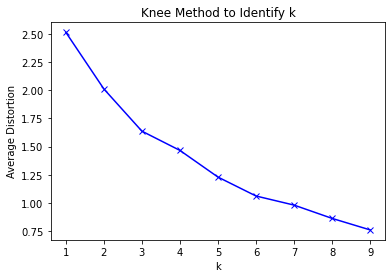

In [21]:
from scipy.spatial.distance import cdist
clusters = range(1,10)
meanDistortions = []
 
for k in clusters:
    model = KMeans(n_clusters= k)
    model.fit(tech_supp_scaled)
    prediction= model.predict(tech_supp_scaled)
    meanDistortions.append(sum(np.min(cdist(tech_supp_scaled, model.cluster_centers_, 'euclidean'), axis= 1)) / tech_supp_scaled.shape[0])
        
plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average Distortion')
plt.title('Knee Method to Identify k')
plt.show()

In [27]:
## Use k = 3
final_model = KMeans(3)
final_model.fit(tech_supp_scaled)
prediction = final_model.predict(tech_supp_scaled)

#Append the prediction
tech_supp_df['Group'] = prediction
tech_supp_scaled['Group'] = prediction
print('Groups Assigned: \n')
tech_supp_df.head()

Groups Assigned: 



,PROBLEM_TYPE,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent,Group
0,Temperature control not working,170,1.3,32,0.04,0.0,75,25,1
1,power chord does not tightly fit,12,2.0,150,0.01,0.5,5,95,0
2,Fan swing not working,5,1.0,35,0.02,0.2,90,10,1
3,Main switch does not on,3,2.0,8,0.01,0.7,5,95,0
4,Forgot mobile app password,45,2.3,54,0.15,0.0,99,1,1


In [28]:
tech_supp_clust = tech_supp_scaled.groupby(['Group'])
tech_supp_clust.mean()

,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent
Group,,,,,,,
0,-0.201991,-0.151228,-0.262973,0.240375,0.970530,-1.348020,1.348020
1,0.574316,-0.722017,-0.677281,-0.084694,-0.426712,0.463833,-0.463833
2,-0.721537,1.379794,1.435604,-0.139282,-0.421098,0.799636,-0.799636


In [29]:
tech_supp_clust = tech_supp_df.groupby(['Group'])
tech_supp_clust.mean()

,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent
Group,,,,,,,
0,112.142857,1.828571,47.857143,0.165714,0.272857,20.714286,79.285714
1,229.900000,1.280000,24.000000,0.128000,0.024000,86.900000,13.100000
2,33.333333,3.300000,145.666667,0.121667,0.025000,99.166667,0.833333


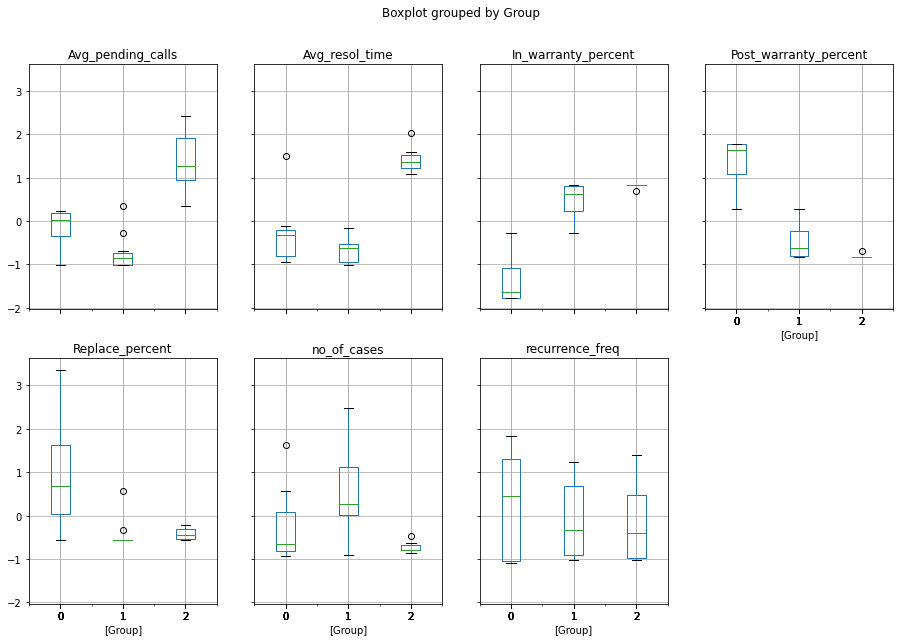

In [31]:
tech_supp_scaled.boxplot(by='Group', layout=(2,4), figsize=(15,10));

In [32]:
## Use k = 5
final_model = KMeans(5)
final_model.fit(tech_supp_scaled)
prediction = final_model.predict(tech_supp_scaled)

#Append the prediction
tech_supp_df['Group'] = prediction
tech_supp_scaled['Group'] = prediction
print('Groups Assigned: \n')
tech_supp_df.head()

Groups Assigned: 



,PROBLEM_TYPE,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent,Group
0,Temperature control not working,170,1.3,32,0.04,0.0,75,25,1
1,power chord does not tightly fit,12,2.0,150,0.01,0.5,5,95,4
2,Fan swing not working,5,1.0,35,0.02,0.2,90,10,1
3,Main switch does not on,3,2.0,8,0.01,0.7,5,95,4
4,Forgot mobile app password,45,2.3,54,0.15,0.0,99,1,1


In [33]:
tech_supp_clust = tech_supp_df.groupby(['Group'])
tech_supp_clust.mean()

,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent
Group,,,,,,,
0,395.250000,1.025,7.750000,0.240000,0.000,87.500000,12.500000
1,119.666667,1.450,34.833333,0.053333,0.040,86.500000,13.500000
2,33.333333,3.300,145.666667,0.121667,0.025,99.166667,0.833333
3,154.000000,1.760,35.400000,0.228000,0.142,27.000000,73.000000
4,7.500000,2.000,79.000000,0.010000,0.600,5.000000,95.000000


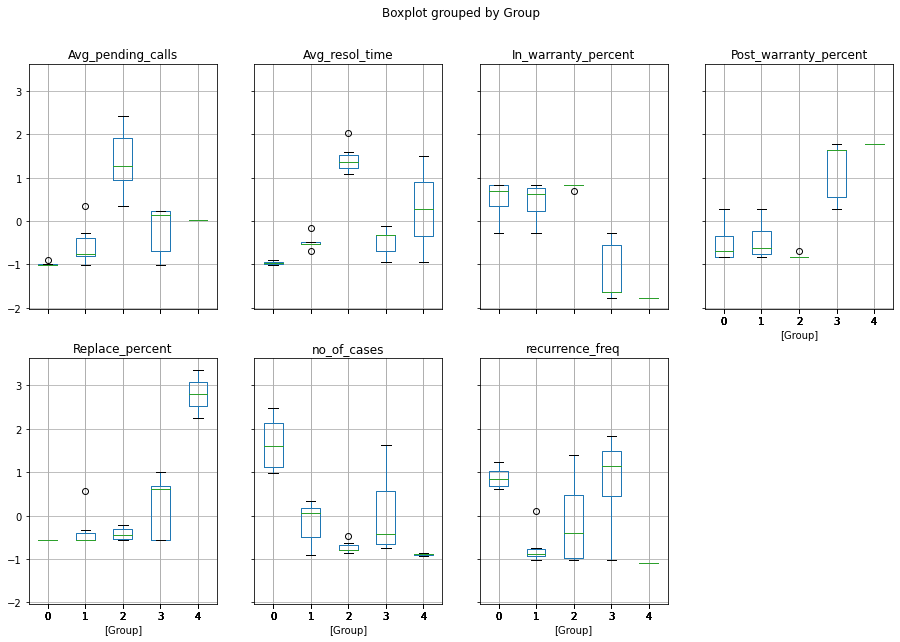

In [34]:
tech_supp_scaled.boxplot(by='Group', layout=(2,4), figsize=(15,10));